In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset.csv')

In [26]:
df['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [4]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [6]:
texts = df['Text'].tolist()
labels = df['language'].tolist()

In [7]:
# Tokenisasi teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [8]:
# Ubah teks menjadi urutan angka
sequences = tokenizer.texts_to_sequences(texts)

In [9]:
# Padding untuk mendapatkan data dengan panjang yang seragam
padded_sequences = pad_sequences(sequences)

In [10]:
# Konversi label menjadi array numerik
label_dict = {label: i for i, label in enumerate(set(labels))}
numeric_labels = np.array([label_dict[label] for label in labels])



In [11]:
# Pembagian data menjadi data latih dan data validasi (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, numeric_labels, test_size=0.2, random_state=42)

In [12]:
# Membangun model LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=X_train.shape[1]))
model.add(LSTM(100))
model.add(Dense(len(set(labels)), activation='softmax'))

In [13]:
# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Callback untuk early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [16]:
# Melatih model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
550/550 [==============================] - 349s 634ms/step - loss: 1.2052 - accuracy: 0.6451 - val_loss: 0.3860 - val_accuracy: 0.8864
Epoch 2/10
550/550 [==============================] - 346s 629ms/step - loss: 0.2863 - accuracy: 0.9103 - val_loss: 0.2520 - val_accuracy: 0.9132
Epoch 3/10
550/550 [==============================] - 347s 632ms/step - loss: 0.1058 - accuracy: 0.9733 - val_loss: 0.2299 - val_accuracy: 0.9223
Epoch 4/10
550/550 [==============================] - 348s 632ms/step - loss: 0.0354 - accuracy: 0.9935 - val_loss: 0.2317 - val_accuracy: 0.9218
Epoch 5/10
550/550 [==============================] - 352s 641ms/step - loss: 0.0161 - accuracy: 0.9969 - val_loss: 0.2186 - val_accuracy: 0.9300
Epoch 6/10
550/550 [==============================] - 353s 642ms/step - loss: 0.0284 - accuracy: 0.9953 - val_loss: 0.2383 - val_accuracy: 0.9250
Epoch 7/10
550/550 [==============================] - 348s 633ms/step - loss: 0.0097 - accuracy: 0.9984 - val_loss: 0.2278 -

In [17]:
# Evaluasi model pada dataset validasi
val_loss, val_accuracy = model.evaluate(X_val, y_val)

print(f'\nAkurasi pada dataset validasi: {val_accuracy * 100:.2f}%')


138/138 [==============================] - 9s 67ms/step - loss: 0.2595 - accuracy: 0.9220

Akurasi pada dataset validasi: 92.20%


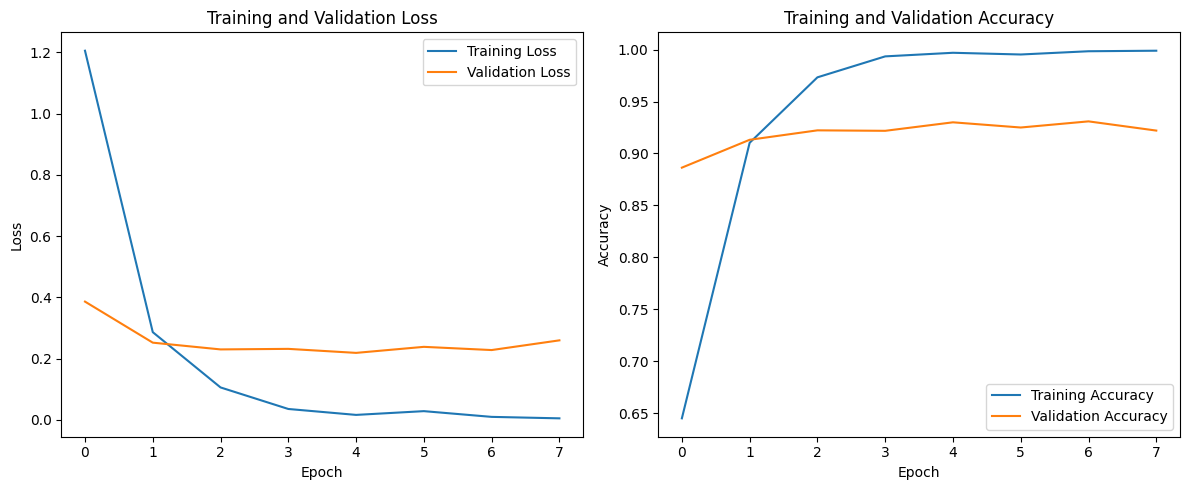

In [31]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

In [30]:
# Fungsi untuk melakukan prediksi dari input pengguna
def predict_language(input_text):
    # Tokenisasi dan padding input
    input_sequence = tokenizer.texts_to_sequences([input_text])
    padded_input = pad_sequences(input_sequence, maxlen=X_train.shape[1])

    # Melakukan prediksi
    prediction = model.predict(padded_input)

    # Mengambil kelas dengan probabilitas tertinggi sebagai prediksi
    predicted_class = np.argmax(prediction)

    # Mengembalikan label bahasa yang sesuai
    for label, index in label_dict.items():
        if index == predicted_class:
            return label

# Contoh penggunaan
user_input = input("Masukkan teks untuk diprediksi bahasanya: ")
predicted_language = predict_language(user_input)

print(f"Prediksi Bahasa: {predicted_language}")

Masukkan teks untuk diprediksi bahasanya: Anda dapat menggunakan kalimat tersebut sebagai input untuk model klasifikasi bahasa yang telah Anda latih sebelumnya. Pastikan juga bahwa data uji yang Anda gunakan sesuai dengan format dan tokenisasi yang digunakan selama pelatihan model.
1/1 [==============================] - 0s 59ms/step
Prediksi Bahasa: Indonesian
